In [2]:
import sys
from pathlib import Path

# add project root to Python path (so that the notebook can see src)
project_root = Path.cwd().parent
sys.path.append(str(project_root))
# sys.path
# ^ uncomment and run above line to verify it worked

# NVDA–SPX Risk & Dependence (Step-by-step)

We’ll build this project module-by-module.

Next: implement `src/nvda_spx/data.py` to download prices and compute returns.


In [3]:
# quick test to make sure data.py is working

from src.nvda_spx.data import download_prices, compute_returns

prices = download_prices("^GSPC", "NVDA", "2018-01-01")
prices.head()

Ticker,NVDA,SPX
Date,,
2018-01-02,4.928533,2695.810059
2018-01-03,5.252899,2713.060059
2018-01-04,5.280589,2723.989990
2018-01-05,5.325339,2743.149902
2018-01-08,5.488510,2747.709961


In [4]:
rets = compute_returns(prices)
prices.shape, rets.shape, rets.head()

((2016, 2),
 (2015, 2),
 Ticker          NVDA       SPX
 Date                          
 2018-01-03  0.065814  0.006399
 2018-01-04  0.005271  0.004029
 2018-01-05  0.008474  0.007034
 2018-01-08  0.030641  0.001662
 2018-01-09 -0.000270  0.001303)

In [5]:
# testing ex_nvda_return

from src.nvda_spx.data import download_prices, compute_returns
from src.nvda_spx.ex_nvda import ex_nvda_return

prices = download_prices("^GSPC", "NVDA", "2018-01-01")
rets = compute_returns(prices)

w = 0.07  # placeholder
ex = ex_nvda_return(rets["SPX"], rets["NVDA"], w)

rets.join(ex).head()

,NVDA,SPX,SPX_exNVDA
Date,,,
2018-01-03,0.065814,0.006399,0.001927
2018-01-04,0.005271,0.004029,0.003935
2018-01-05,0.008474,0.007034,0.006925
2018-01-08,0.030641,0.001662,-0.000519
2018-01-09,-0.000271,0.001303,0.001421


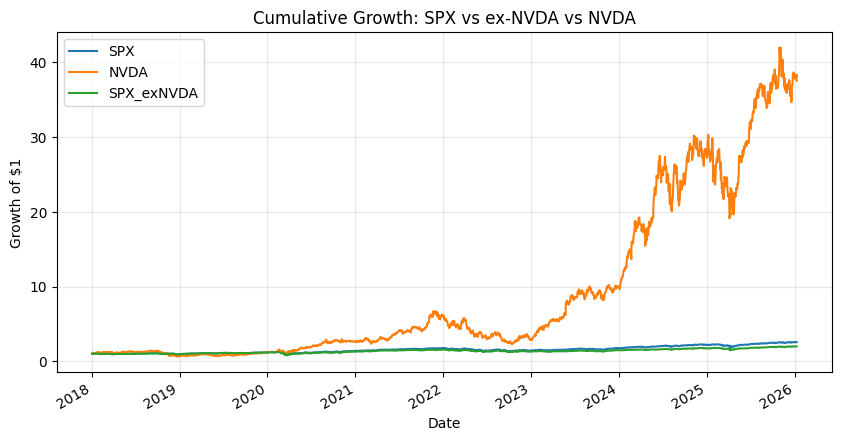

In [6]:
# testing plot_cumulative (on placeholder weight)

from src.nvda_spx.data import download_prices, compute_returns
from src.nvda_spx.ex_nvda import ex_nvda_return
from src.nvda_spx.plotting import plot_cumulative

prices = download_prices("^GSPC", "NVDA", "2018-01-01")
rets = compute_returns(prices)

w = 0.07
ex = ex_nvda_return(rets["SPX"], rets["NVDA"], w)

to_plot = rets[["SPX", "NVDA"]].join(ex)
plot_cumulative(to_plot, title="Cumulative Growth: SPX vs ex-NVDA vs NVDA");

The plot above is telling us that a dollar invested in SPX in 2018 corresponds to about \~3x return in eight years, but in the same time period, that same dollar in NVDA sees almost 40x return. Using the formula $R_a = (1 + R_c)^{1/n} - 1$, we see that NVDA's 2018-2026 return corresponds to **~60% annualized returns** (at peak periods) compared to just under 20% for SPX. Behavior this far out of line with normal equity returns is highly rare, but perhaps not all that unusual for a single stock undergoing a technological paradigm shift, especially when preceded by COVID supply disruptions and exploding demand (lots of people were at home playing video games, after all).

It should be noted as well that 20% annualized returns in eight years is not bad for a post-2010 bull market. As such, we should not emotionally take away the idea that SPX was doing poorly in this period, but rather that NVDA is undergoing unprecedented rapid growth. This by itself is not news, but what is interesting is that `SPX_exNVDA` is underneath but very close to `SPX`, even in late 2025 when NVDA returns have (so far) reached their peak cumulative growth in this time period. This tells us something important: removing NVDA *does not collapse the SPX index*. This could perhaps suggest it is more accurate to call NVDA a systemic market dependency than a bubble stock, but that's not evidence on its own, so let's dig deeper.